# Prediction of house prices based on house size in Metro cities

In [14]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# 2. Load the dataset from CSV
data = pd.read_csv(r'C:\Users\Vishnu\Downloads\house_price_prediction_dataset.csv')

In [20]:
# 3. Explore the dataset
print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nNull Values in the Dataset:")
print(data.isnull().sum())

First 5 rows of the dataset:
   House Size (sq ft)  House Price (INR Lakhs)
0                 850                       90
1                 900                       95
2                 950                      100
3                1000                      110
4                1050                      115

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   House Size (sq ft)       25 non-null     int64
 1   House Price (INR Lakhs)  25 non-null     int64
dtypes: int64(2)
memory usage: 532.0 bytes
None

Null Values in the Dataset:
House Size (sq ft)         0
House Price (INR Lakhs)    0
dtype: int64


In [22]:
# 4. Handle Null Values

if data.isnull().sum().sum() > 0:
    
    data = data.dropna()  

    
    # Example: Drop rows with null values (we can also fill with mean/median if preferred)
    # Alternatively, use data.fillna(data.mean(), inplace=True)

In [24]:
# 5. Split the data into features (X) and target (y)


X = data[['House Size (sq ft)']] 
y = data['House Price (INR Lakhs)'] 

In [26]:
# 6. Split the dataset into training and testing sets (70% train, 30% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# 7. Train the Linear Regression model


model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# 8. Predict on the test data

y_pred = model.predict(X_test)

In [32]:
# 9. Evaluate the model


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'\nMean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3.930584131098927
R-squared: 0.997674533077048


In [34]:
# 10. Compare Actual vs Predicted values
comparison_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print("\nComparison of Actual vs Predicted Prices:")
print(comparison_df)


Comparison of Actual vs Predicted Prices:
    Actual Price  Predicted Price
8            140       136.979495
16           180       183.856467
0             90        90.102524
23           225       224.873817
11           155       154.558360
9            145       142.839117
13           165       166.277603
1             95        95.962145


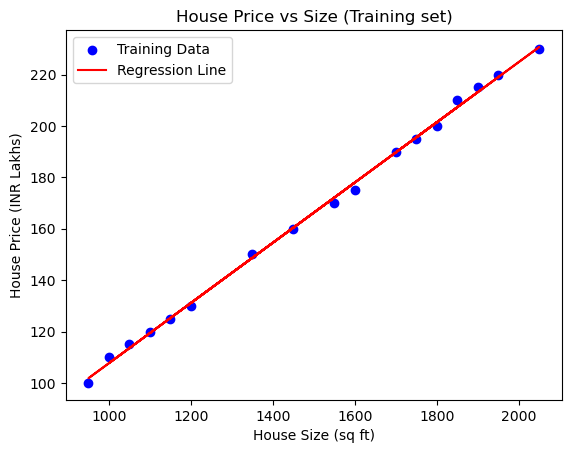

In [44]:
# 11. Visualize the training results
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.title('House Price vs Size (Training set)')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price (INR Lakhs)')
plt.legend()
plt.show()

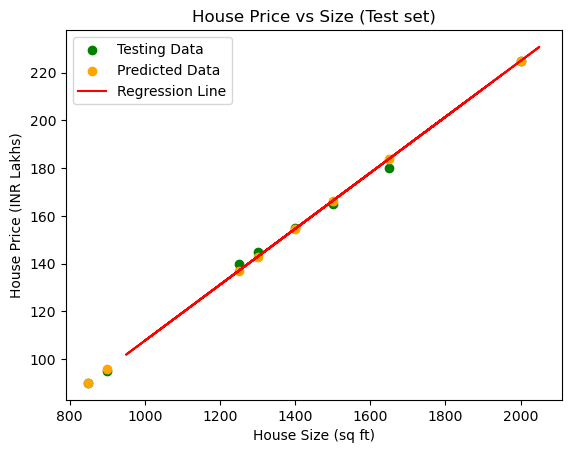

In [46]:
# 12. Visualize the testing results
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.scatter(X_test, y_pred, color='orange', label='Predicted Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.title('House Price vs Size (Test set)')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price (INR Lakhs)')
plt.legend()
plt.show()

In [40]:
# 12. Get the coefficient and intercept
coefficient = model.coef_[0]  # For a single feature, it returns an array
intercept = model.intercept_

print(f'Coefficient (slope): {coefficient}')
print(f'Intercept (bias): {intercept}')

Coefficient (slope): 0.11719242902208205
Intercept (bias): -9.511041009463753


In [50]:
#13 Prediction
sizes = pd.DataFrame({'House Size (sq ft)': np.arange(2100, 2501, 100)})  # From 2100 to 2500 in steps of 100

# Predicting prices for the new sizes
predicted_prices = model.predict(sizes)

# Creating a DataFrame for the results
predicted_df = pd.DataFrame({'House Size (sq ft)': sizes['House Size (sq ft)'], 'Predicted Price (INR Lakhs)': predicted_prices})

# Display the results
print(predicted_df)

   House Size (sq ft)  Predicted Price (INR Lakhs)
0                2100                   236.593060
1                2200                   248.312303
2                2300                   260.031546
3                2400                   271.750789
4                2500                   283.470032
